## Artificial Intelligence Assignment 2
## No4. Neural Network
## 20132651 Sungjae Lee

In [1]:
import torch

In [2]:
N, D_in, H, D_out = 64, 1000, 100, 10

# 신경망을 구성하기 위해, 해당 신경망 층에서 입력, 각 층의 노드 개수, 출력 개수를
# N, D_in, H, D_out 으로 정의합니다

In [3]:
x = torch.randn(N, D_in)
y = torch.randn(N, D_out) ## D -> N
w1 = torch.randn(D_in, H)
w2 = torch.randn(H, D_out)

# 입력값인 x 는 64 * 1000 형태의 매트릭스로 생성합니다
# 출력값인 y 는 64 * 10 형태의 매트릭스로 생성합니다
# 첫 번째 가중치인 w1 은 1000 * 100 형태의 매트릭스로 생성합니다
# 두 번째 가중치인 w2 는 100 * 64 형태의 매트릭스로 생성합니다

In [4]:
learning_rate = 10e-2

# 학습률을 10e - 6 값으로 설정하여 저장합니다.

In [5]:
loss_list = []
for t in range(500):
    h = x.mm(w1)
    h_relu = h.clamp(min = 0)
    y_pred = h_relu.mm(w2)
    loss = (y_pred - y).pow(2).sum()
    print(t, loss.item())
    loss_list.append(loss.item())
    
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)
    
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
    
# 위에서의 설정값들을 바탕으로 에러를 계산합니다.
# 500회 반복하며 loss 가 최저가 되는 weight 들을 찾기 위한 과정입니다.

# 상세히 설명하면, 먼저 입력 x 와 w1 을 matmul 하여 h 에 저장합니다
# h 에 대해 relu 함수와 동일한 기능인 clamp(min = 0) 을 사용하여 h_relu 에 저장합니다
# w2 와 h_relu 를 matmul 한 결과를 y 에 대한 예측값 y_pred 로 저장하며,
# 최종적으로 y_pred 와 y 를 이용해 손실값인 loss 를 계산합니다

# 결과를 보기 위해 print(t, loss.item) 을 사용하였습니다.
# 해당 결과에 대해 그래프로 살펴보기 위해 loss_list 변수를 생성하여 append 하였습니다.

# 다음으로 y_pred 와 y 값의 차이를 이용하여 역전파를 진행,
# w1 과 w2 값을 learning rate 에 비례하여 수정합니다.

0 34848948.0
1 1.7964814237872605e+24
2 inf
3 nan
4 nan
5 nan
6 nan
7 nan
8 nan
9 nan
10 nan
11 nan
12 nan
13 nan
14 nan
15 nan
16 nan
17 nan
18 nan
19 nan
20 nan
21 nan
22 nan
23 nan
24 nan
25 nan
26 nan
27 nan
28 nan
29 nan
30 nan
31 nan
32 nan
33 nan
34 nan
35 nan
36 nan
37 nan
38 nan
39 nan
40 nan
41 nan
42 nan
43 nan
44 nan
45 nan
46 nan
47 nan
48 nan
49 nan
50 nan
51 nan
52 nan
53 nan
54 nan
55 nan
56 nan
57 nan
58 nan
59 nan
60 nan
61 nan
62 nan
63 nan
64 nan
65 nan
66 nan
67 nan
68 nan
69 nan
70 nan
71 nan
72 nan
73 nan
74 nan
75 nan
76 nan
77 nan
78 nan
79 nan
80 nan
81 nan
82 nan
83 nan
84 nan
85 nan
86 nan
87 nan
88 nan
89 nan
90 nan
91 nan
92 nan
93 nan
94 nan
95 nan
96 nan
97 nan
98 nan
99 nan
100 nan
101 nan
102 nan
103 nan
104 nan
105 nan
106 nan
107 nan
108 nan
109 nan
110 nan
111 nan
112 nan
113 nan
114 nan
115 nan
116 nan
117 nan
118 nan
119 nan
120 nan
121 nan
122 nan
123 nan
124 nan
125 nan
126 nan
127 nan
128 nan
129 nan
130 nan
131 nan
132 nan
133 nan
134 nan
135 

### (1) y_pred에 따른 loss (accuracy) 변화를 화면 출력 확인 (plot)

In [6]:
import matplotlib.pyplot as plt

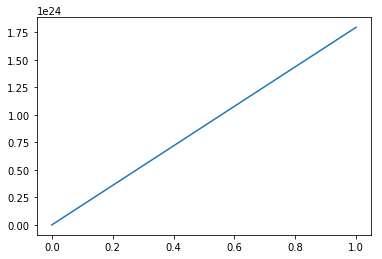

In [7]:
plt.plot(loss_list)
plt.show()

# matplotlib 을 이용하여 t 에 따른 loss 값의 변화를 그래프로 알아보았습니다.
# t 값이 기하급수적으로 증가함에 따라 0, 1, 2 번째 값이 고정된 것 처럼 보일 정도로
# 3번째 값이 크게 나타나는 것을 볼 수 있습니다. loss 가 발산하는 것이라 할 수 있습니다.

### (2) 해당 학습이 적절히 진행되고 있는지 서술

In [8]:
# 해당 학습은 적절하게 진행되지 않고 있습니다
# 그 이유는 learning_rate 가 10e-06 으로 너무 큰 값을 가지고 있기 때문입니다.
# learning_rate 를 줄여서 시행한다면 더 나은 결과를 볼 수 있습니다.